In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
# plt.style.use("seaborn-whitegrid")
# plt.rc("figure", autolayout=True)
# plt.rc(
#     "axes",
#     labelweight="bold",
#     labelsize="large",
#     titleweight="bold",
#     titlesize=14,
#     titlepad=10,
# )

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/netflix-userbase-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv("/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv")
df.head() 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [2]:
print(df.shape)

(2500, 10)


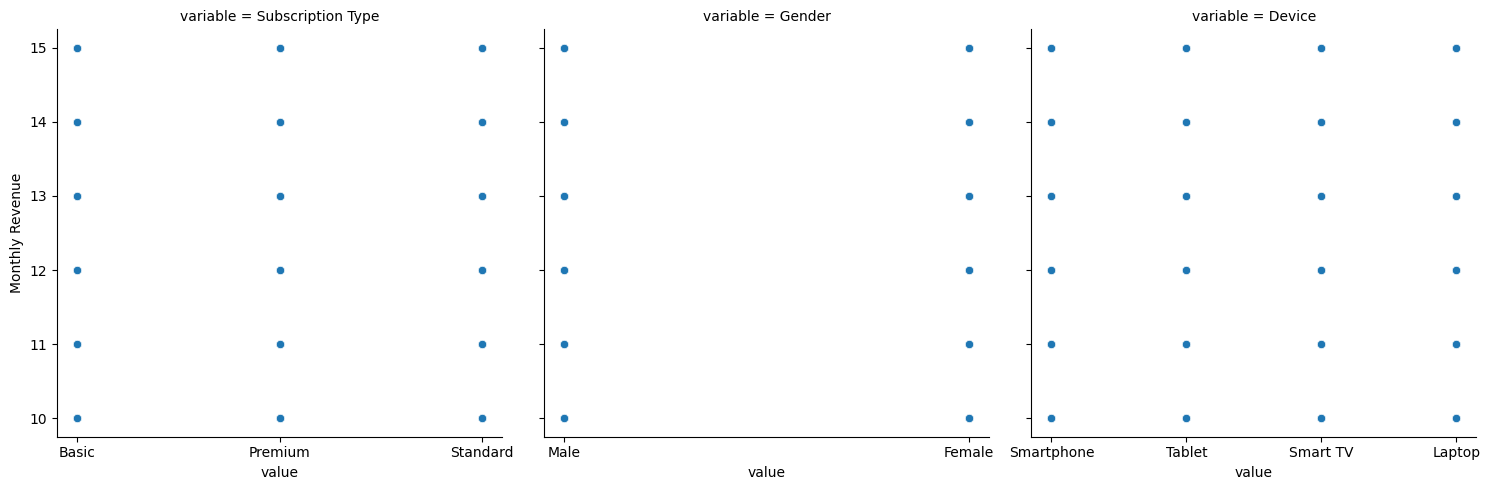

In [3]:
features = ["Subscription Type", "Gender", "Device"]
sns.relplot(
    x="value", y="Monthly Revenue", col="variable", data=df.melt(id_vars="Monthly Revenue", value_vars=features), facet_kws=dict(sharex=False),
);

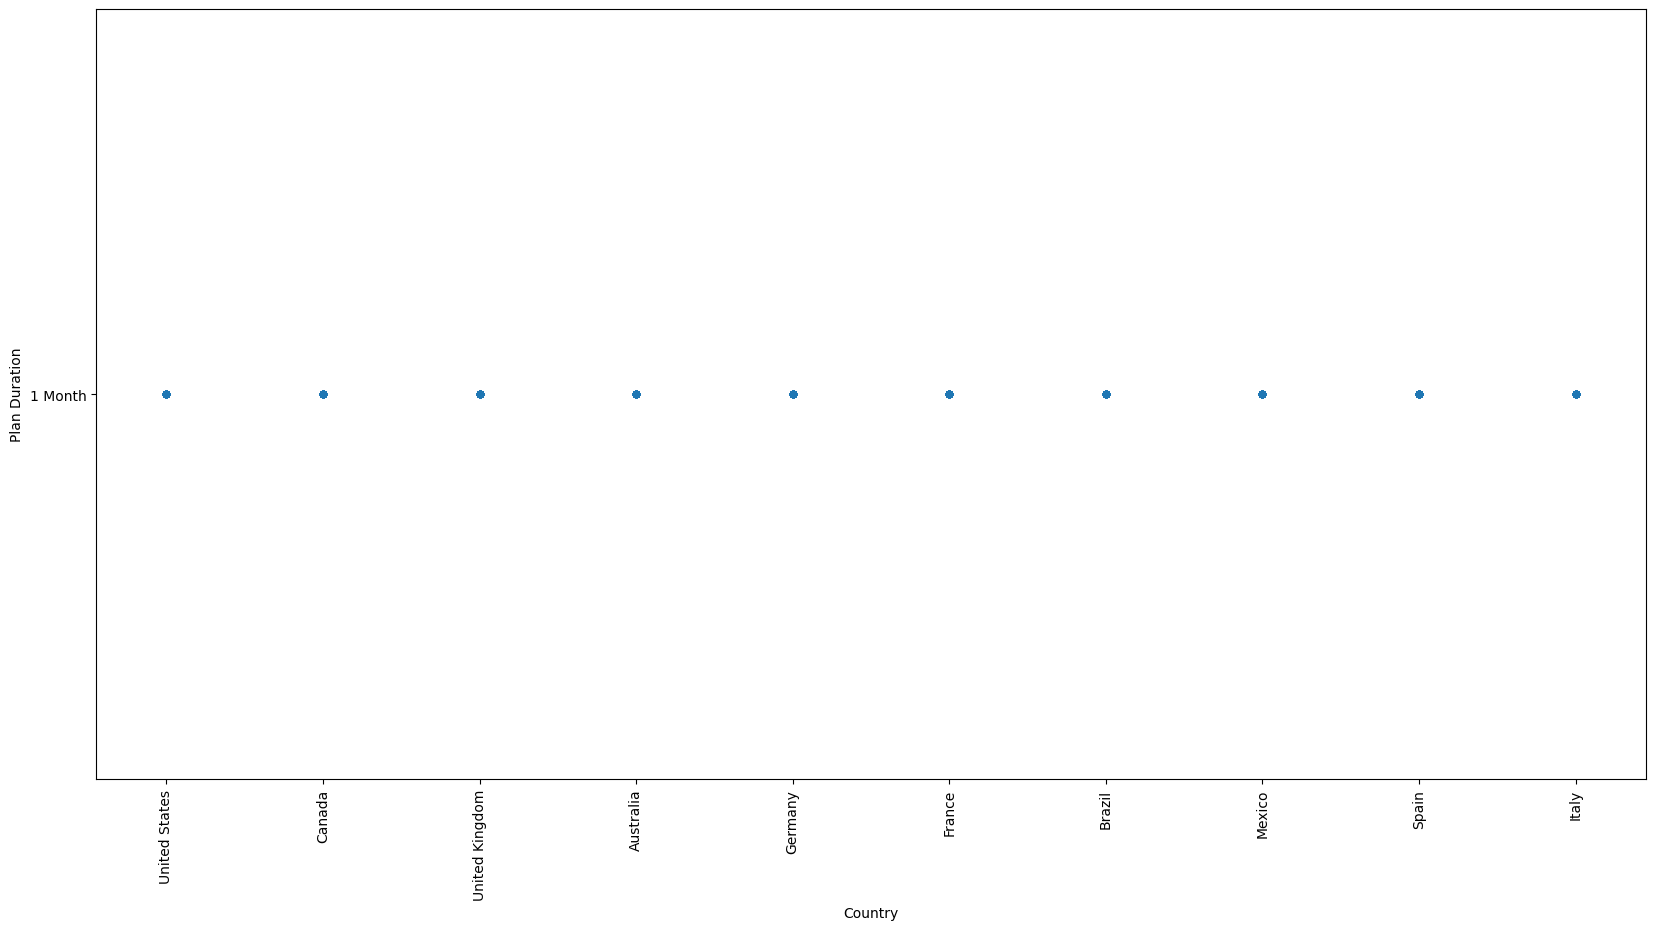

In [4]:
plot_imdb = df.plot.scatter(x='Country', y='Plan Duration', figsize=(20, 10), rot=90)

In [5]:
netflix_users_count = df.groupby(['Device']).count().reset_index()
netflix_users_count.head()

,Device,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Plan Duration
0,Laptop,636,636,636,636,636,636,636,636,636
1,Smart TV,610,610,610,610,610,610,610,610,610
2,Smartphone,621,621,621,621,621,621,621,621,621
3,Tablet,633,633,633,633,633,633,633,633,633


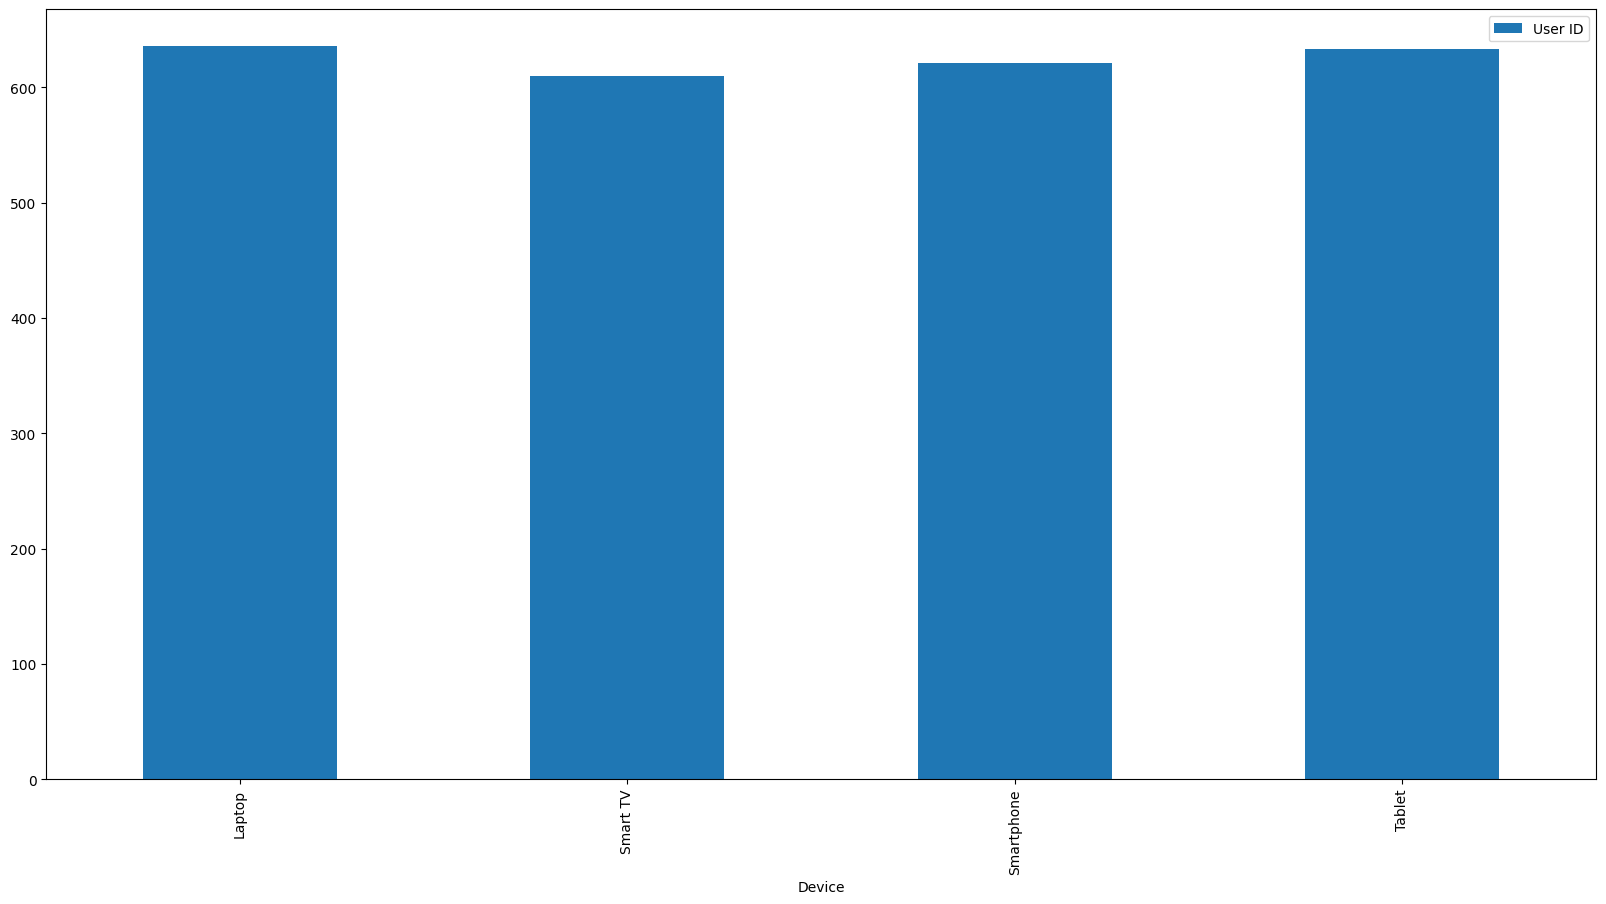

In [6]:
plot_device = netflix_users_count.plot.bar(x='Device', y='User ID', figsize=(20, 10), rot=90)

In [7]:
netflix_users_subs_revenue = df.groupby(['Subscription Type']).sum().reset_index()
subs_revenue = netflix_users_subs_revenue.loc[:,['Subscription Type','Monthly Revenue']]
subs_revenue.head()

,Subscription Type,Monthly Revenue
0,Basic,12469
1,Premium,9229
2,Standard,9573


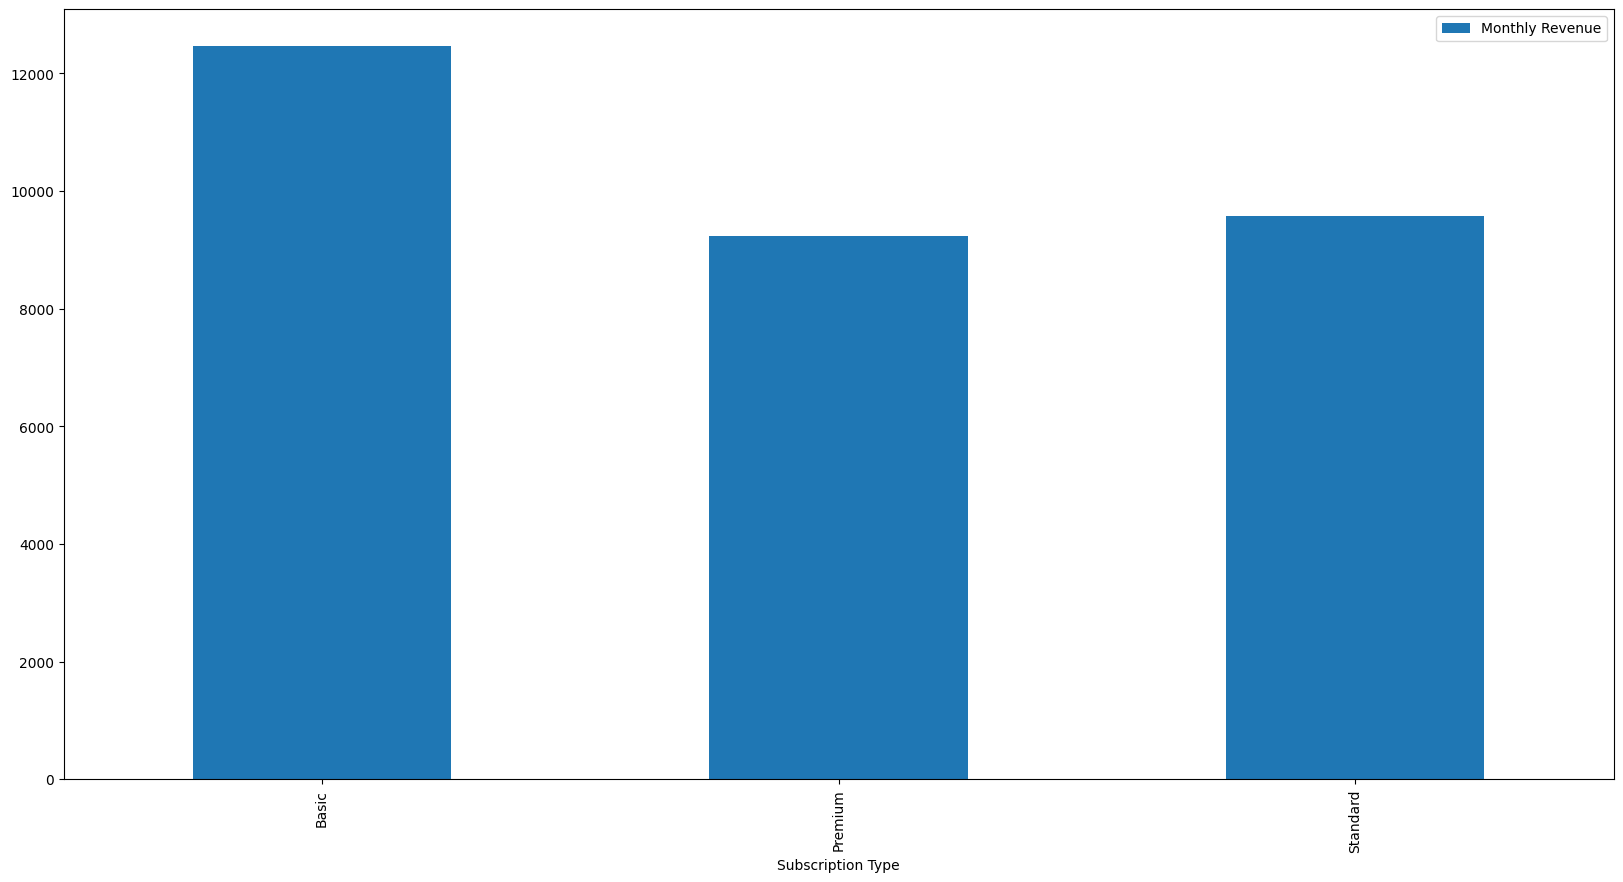

In [8]:
plot_monthly_revenue = subs_revenue.plot.bar(x='Subscription Type', y='Monthly Revenue', figsize=(20, 10), rot=90)

In [13]:
subs_monthly_revenue = df[["Monthly Revenue","Subscription Type"]]
subs_monthly_revenue["Subscription Type & Revenue"] = subs_monthly_revenue["Subscription Type"]+" $"+subs_monthly_revenue["Monthly Revenue"].astype(str)
subs_monthly_revenue = subs_monthly_revenue.groupby(['Subscription Type & Revenue']).sum().reset_index().drop(columns=['Subscription Type'])
#subs_monthly_revenue.drop(columns=['Subscription Type'])
subs_monthly_revenue.sort_values("Monthly Revenue",ascending=True)[['Subscription Type & Revenue','Monthly Revenue']].plot.bar
subs_monthly_revenue.head()

/tmp/ipykernel_33/1311333176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs_monthly_revenue["Subscription Type & Revenue"] = subs_monthly_revenue["Subscription Type"]+" $"+subs_monthly_revenue["Monthly Revenue"].astype(str)


,Subscription Type & Revenue,Monthly Revenue
0,Basic $10,1600
1,Basic $11,1859
2,Basic $12,2160
3,Basic $13,2184
4,Basic $14,2296


<Axes: xlabel='Subscription Type & Revenue'>

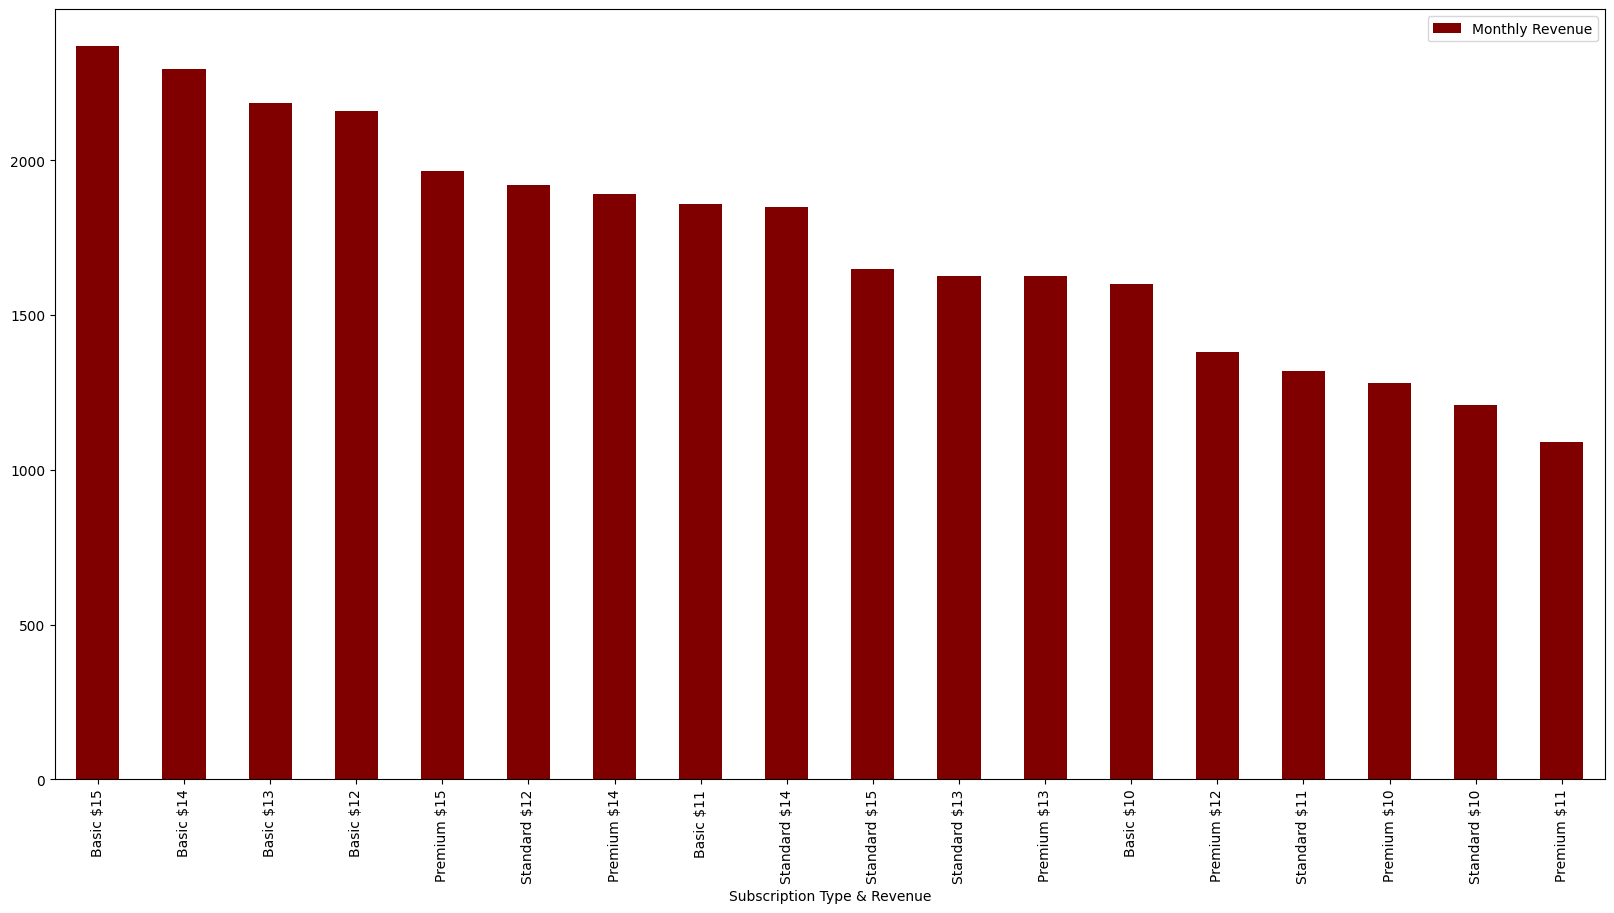

In [10]:
subs_monthly_revenue.sort_values("Monthly Revenue",ascending=False).plot.bar(x='Subscription Type & Revenue', y='Monthly Revenue', color ='maroon', figsize=(20, 10), rot=90)